In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
def leer_archivo(nombre_archivo):
    try:
        with open(nombre_archivo, "r", encoding="utf-8") as file:
            lineas = file.readlines()
    except UnicodeDecodeError:
        with open(nombre_archivo, "r", encoding="latin1") as file:
            lineas = file.readlines()

    # Convertir a DataFrame y limpiar contenido
    df = pd.DataFrame(lineas, columns=["Contenido"])
    df["Contenido"] = df["Contenido"].str.strip()
    return df

train = leer_archivo("thai_nlp/train.txt")
train_label = leer_archivo("thai_nlp/train_label.txt")
test = leer_archivo("thai_nlp/test.txt")
test_label = leer_archivo("thai_nlp/test_label.txt")

In [3]:
train["Label"] = train_label["Contenido"]
test["Label"] = test_label["Contenido"]

In [4]:
df = pd.concat([train, test], ignore_index=True)

In [5]:
df['Label'].value_counts()

Label
neu    14561
neg     6823
pos     4778
q        575
Name: count, dtype: int64

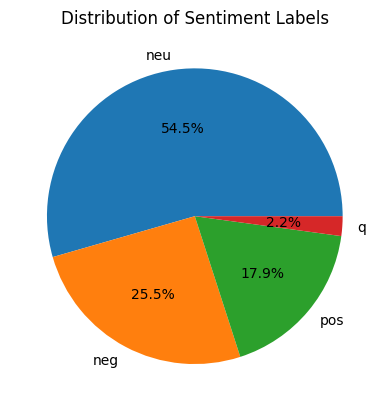

In [6]:
plt.pie(df['Label'].value_counts(), 
        labels=df['Label'].unique().tolist(), 
        autopct='%1.1f%%')
plt.title("Distribution of Sentiment Labels")
plt.show()


In [7]:
df['comment_length'] = df.iloc[:, 1].astype(str).apply(len)
df.head()

,Contenido,Label,comment_length
0,ประเทศเราผลิตและส่งออกยาสูบเยอะสุดในโลกจิงป่าวคับ,neu,3
1,คะ,neu,3
2,อิเหี้ยออมทำกูอยากกินเอ็มเค,neg,3
3,😅😅😅,neu,3
4,สวัสดีวันพุธ แนน อะไรนะ,neu,3


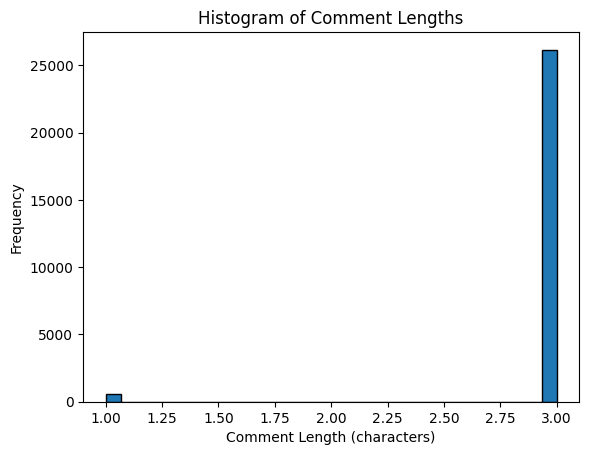

In [8]:
plt.hist(df['comment_length'], bins=30, edgecolor='black')
plt.xlabel("Comment Length (characters)")
plt.ylabel("Frequency")
plt.title("Histogram of Comment Lengths")
plt.show()

In [52]:
df['Word_count'] = df['Contenido'].apply(lambda x: len(str(x).split()))
df.head()

,Contenido,Label,comment_length,Word_count
0,ประเทศเราผลิตและส่งออกยาสูบเยอะสุดในโลกจิงป่าวคับ,neu,3,1
1,คะ,neu,3,1
2,อิเหี้ยออมทำกูอยากกินเอ็มเค,neg,3,1
3,😅😅😅,neu,3,1
4,สวัสดีวันพุธ แนน อะไรนะ,neu,3,3


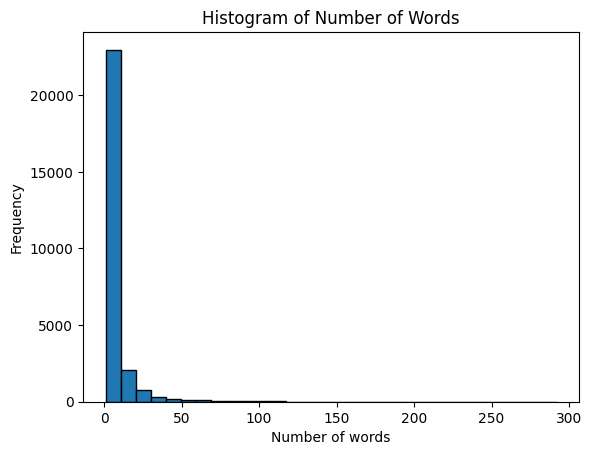

In [53]:
plt.hist(df['Word_count'], bins=30, edgecolor='black')
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.title("Histogram of Number of Words")
plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8216\480744014.py:12: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



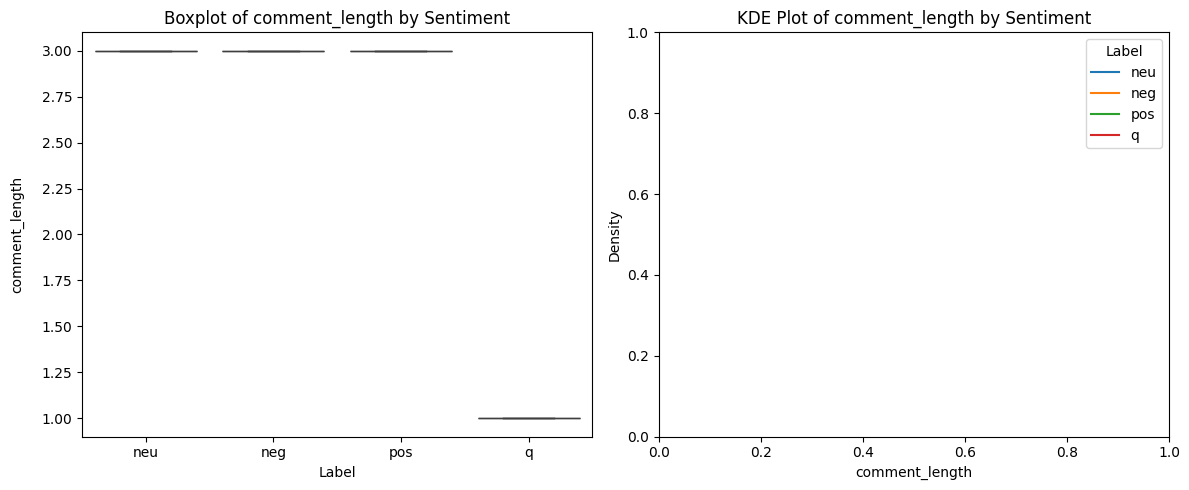

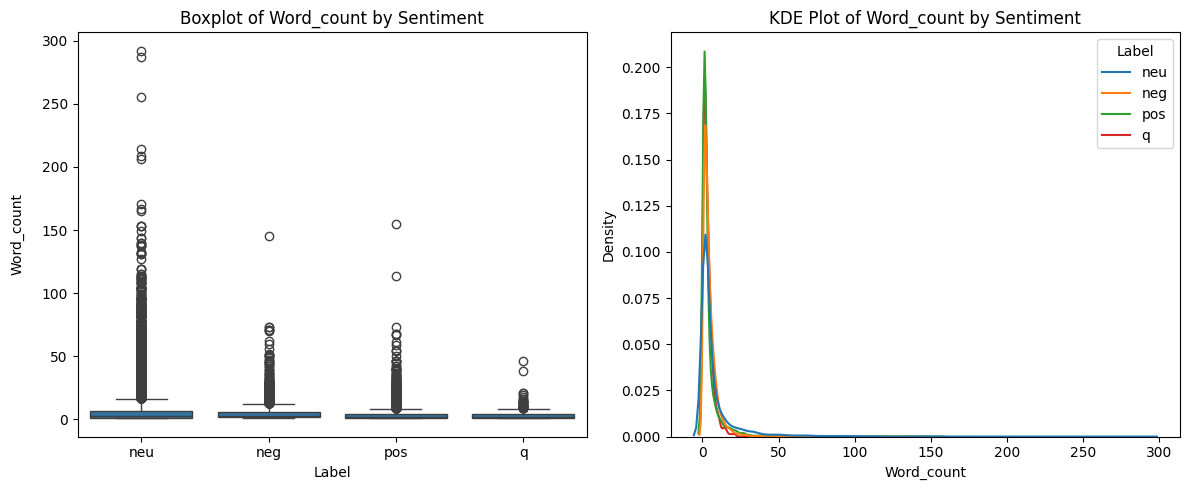

In [60]:
def visualize(col):
    plt.figure(figsize=(12, 5))
    
    # Boxplot for the specified column, comparing by sentiment label
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[col], x=df['Label'])
    plt.ylabel(col, labelpad=12.5)
    plt.title(f"Boxplot of {col} by Sentiment")
    
    # KDE plot for the specified column, comparing by sentiment label
    plt.subplot(1, 2, 2)
    sns.kdeplot(data=df, x=col, hue='Label', common_norm=False)
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.title(f"KDE Plot of {col} by Sentiment")
    
    plt.tight_layout()
    plt.show()

# Define the columns to visualize
features = ['comment_length', 'Word_count']

# Apply the visualize function to each feature in the list
for feature in features:
    visualize(feature)